In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime.fake_provider import FakeManilaV2

In [3]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(5, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

## Alice

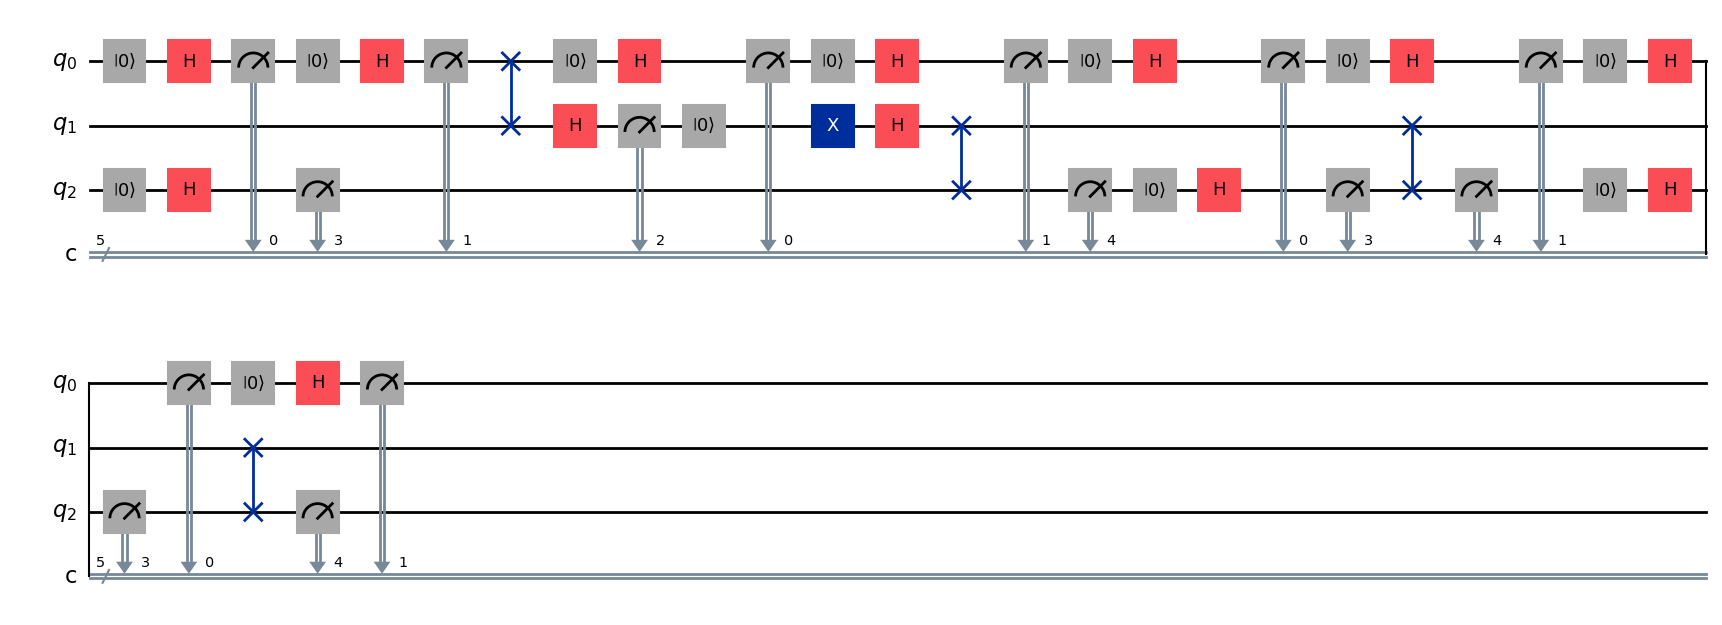

In [ ]:
circuit.reset(qreg_q[0])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

circuit.reset(qreg_q[0])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[1])

if creg_c[0] == 1:
    circuit.x(qreg_q[0])

if creg_c[1] == 1:
    circuit.h(qreg_q[0])



## Spy

In [5]:
circuit.swap(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[1])
circuit.measure(qreg_q[1], creg_c[2])

circuit.reset(qreg_q[1])
circuit.x(qreg_q[1])
circuit.h(qreg_q[1])

## Bob

In [8]:
circuit.reset(qreg_q[2])
circuit.h(qreg_q[2])
circuit.measure(qreg_q[2], creg_c[3])


circuit.swap(qreg_q[1], qreg_q[2])
if creg_c[3] == 1:
    circuit.h(qreg_q[2])

circuit.measure(qreg_q[2], creg_c[4])

if creg_c[3] == creg_c[1]: 
    print("Valid" if creg_c[4] == creg_c[0] else "SPY!!!")
else:
    print("Valid")

Valid


In [ ]:
fake_manila = FakeManilaV2()
pm = generate_preset_pass_manager(backend=fake_manila, optimization_level=1)
isa_qc = pm.run(circuit)
 
# You can use a fixed seed to get fixed results.
options = {"simulator": {"seed_simulator": 42}}
sampler = Sampler(mode=fake_manila, options=options)
 
result = sampler.run([isa_qc]).result()